# Testing AudioMPS class

In [1]:
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

sys.path.append("../")

from model import AudioMPS

In [2]:
sess = tf.InteractiveSession()

## Load Data

In [3]:
BATCH_SIZE = 32

In [4]:
organ_dataset = tf.data.TFRecordDataset('../data/organ.tfrecords')

In [5]:
parse_function = lambda example_proto: tf.parse_single_example(example_proto,
                                                               {"audio": tf.FixedLenFeature([2**16], dtype=tf.float32)})

In [6]:
organ_dataset = organ_dataset.map(parse_function)  # Parse the record into tensors.

In [7]:
organ_dataset = organ_dataset.batch(batch_size=BATCH_SIZE).shuffle(buffer_size=10000).repeat()
organ_iterator = organ_dataset.make_one_shot_iterator()
organ_batch = organ_iterator.get_next()

In [8]:
organ_batch['audio']

<tf.Tensor 'IteratorGetNext:0' shape=(?, 65536) dtype=float32>

In [9]:
sess.run(tf.zeros_like(organ_batch['audio'][:,0]))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

An example waveform

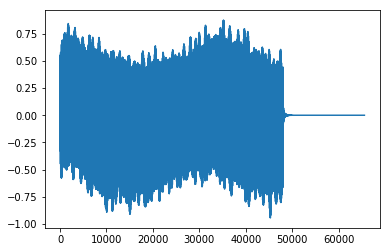

In [10]:
plt.plot(sess.run(organ_batch['audio'])[0])

Close up

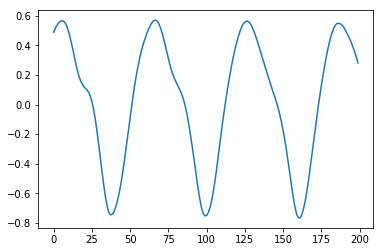

In [11]:
plt.plot(sess.run(organ_batch['audio'])[0][20000:20200])

## Checking the loss works

In [12]:
BOND_D = 5

In [13]:
organ_model = AudioMPS(organ_batch['audio'], BOND_D, delta_t=0.01)

In [15]:
sess.run(tf.global_variables_initializer())

In [16]:
sess.run(organ_model.loss)

InvalidArgumentError: Incompatible shapes: [65536] vs. [32]
	 [[Node: foldl/while/sub_1 = Sub[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](foldl/while/TensorArrayReadV3, foldl/while/mul_4)]]

Caused by op 'foldl/while/sub_1', defined at:
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-e466437ff72a>", line 1, in <module>
    organ_model = AudioMPS(organ_batch['audio'], BOND_D, delta_t=0.01)
  File "../model.py", line 19, in __init__
    self.loss = self._build_loss(data_iterator)
  File "../model.py", line 27, in _build_loss
    _, loss = tf.foldl(self._psi_and_loss_update, data, initializer=(psi_0, loss))
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/functional_ops.py", line 145, in foldl
    swap_memory=swap_memory)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3209, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2941, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2878, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/functional_ops.py", line 138, in compute
    a = fn(a, elem_i)
  File "../model.py", line 34, in _psi_and_loss_update
    loss += self._inc_loss(psi, signal)
  File "../model.py", line 38, in _inc_loss
    return (signal - self._expectation(psi))**2 / 2
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 847, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 8009, in sub
    "Sub", x=x, y=y, name=name)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/Users/austen/anaconda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [65536] vs. [32]
	 [[Node: foldl/while/sub_1 = Sub[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](foldl/while/TensorArrayReadV3, foldl/while/mul_4)]]
